In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
TRAIN_URL = "http://download.tensorflow.org/data/iris_training.csv"
train_path = tf.keras.utils.get_file(TRAIN_URL.split('/')[-1],TRAIN_URL)

In [6]:
df_iris = pd.read_csv(train_path, header=0)
type(df_iris)

pandas.core.frame.DataFrame

In [7]:
iris = np.array(df_iris)
iris.shape

(120, 5)

In [8]:
train_x = iris[:,0:2]
train_y = iris[:,4]
train_x.shape, train_y.shape

((120, 2), (120,))

In [9]:
print(train_y)
temp = train_y < 2
print(temp)
x_train = train_x[train_y < 2]
y_train = train_y[train_y < 2]

[2. 1. 2. 0. 0. 0. 0. 2. 1. 0. 1. 1. 0. 0. 2. 1. 2. 2. 2. 0. 2. 2. 0. 2.
 2. 0. 1. 2. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 0. 0. 2. 2. 2. 0. 0. 2. 0. 2.
 0. 2. 0. 1. 1. 0. 1. 2. 2. 2. 2. 1. 1. 2. 2. 2. 1. 2. 0. 2. 2. 0. 0. 1.
 0. 2. 2. 0. 1. 1. 1. 2. 0. 1. 1. 1. 2. 0. 1. 1. 1. 0. 2. 1. 0. 0. 2. 0.
 0. 2. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 2. 1. 0. 2. 0. 1. 1. 0. 0. 1.]
[False  True False  True  True  True  True False  True  True  True  True
  True  True False  True False False False  True False False  True False
 False  True  True False  True  True  True  True  True False False False
 False False  True  True False False False  True  True False  True False
  True False  True  True  True  True  True False False False False  True
  True False False False  True False  True False False  True  True  True
  True False False  True  True  True  True False  True  True  True  True
 False  True  True  True  True  True False  True  True  True False  True
  True False  True  True  True  True  True  True  

In [10]:
print(y_train)

[1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 1. 1. 0. 0. 1.]


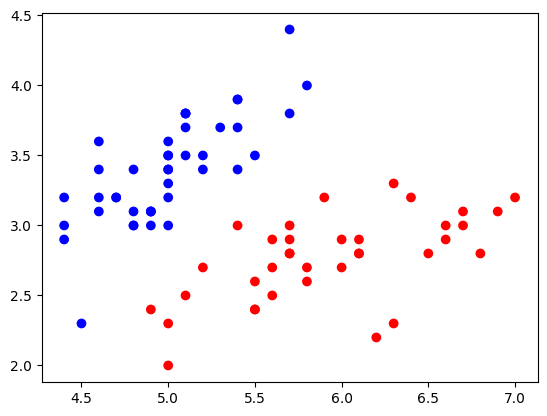

In [11]:
cm_pt = mpl.colors.ListedColormap(["blue","red"])
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=cm_pt)
plt.show()

In [12]:
x_train = x_train - np.mean(x_train,axis=0)

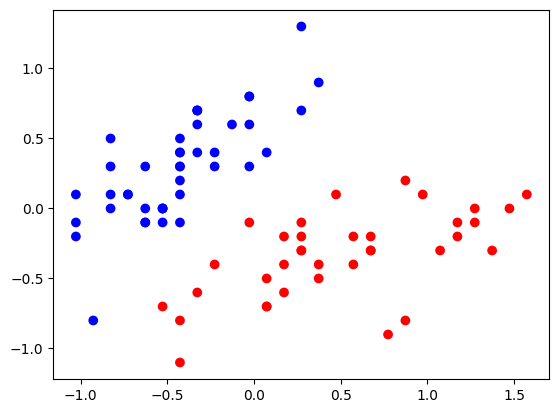

In [13]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=cm_pt)
plt.show()

In [14]:
num = len(x_train)
x0_train = np.ones(num).reshape(-1, 1)
X = tf.cast(tf.concat((x0_train, x_train), axis=1), tf.float32)
Y = tf.cast(y_train.reshape(-1, 1), tf.float32)
X.shape, Y.shape

(TensorShape([78, 3]), TensorShape([78, 1]))

In [15]:
learn_rate = 0.2
iter = 120
display_step = 30

In [16]:
np.random.seed(612)
W = tf.Variable(np.random.randn(3, 1), dtype = tf.float32)

In [17]:
ce = []
acc = []

for i in range(0, iter + 1):
    with tf.GradientTape() as tape:
        PRED = 1 / (1 + tf.exp(-tf.matmul(X, W)))
        Loss = -tf.reduce_mean(Y*tf.math.log(PRED) + (1 - Y)*tf.math.log(1 - PRED))
        
    accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.where(PRED.numpy() < 0.5, 0., 1.), Y), tf.float32))
    ce.append(Loss)
    acc.append(accuracy)
    
    dL_dW = tape.gradient(Loss, W)
    W.assign_sub(learn_rate * dL_dW)
    
    if i % display_step == 0:
        print("i: %i, Acc: %f, Loss: %f" % (i, accuracy, Loss))

i: 0, Acc: 0.230769, Loss: 0.994269
i: 30, Acc: 0.961538, Loss: 0.481892
i: 60, Acc: 0.987179, Loss: 0.319128
i: 90, Acc: 0.987179, Loss: 0.246626
i: 120, Acc: 1.000000, Loss: 0.204982


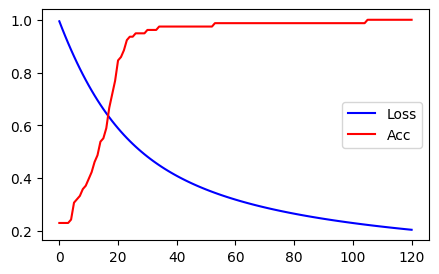

In [18]:
plt.figure(figsize=(5,3))
plt.plot(ce, color = "blue", label="Loss")
plt.plot(acc, color = "red", label="Acc")
plt.legend()
plt.show()

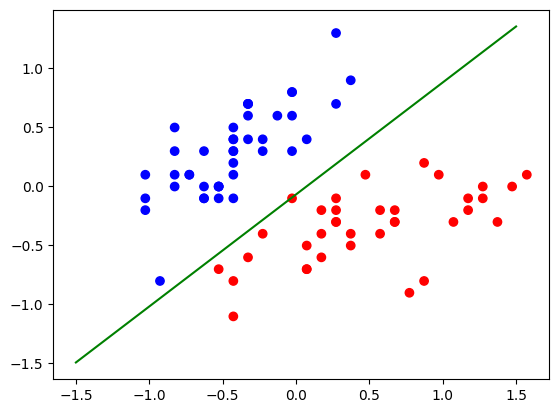

In [19]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=cm_pt)
x_ = [-1.5, 1.5]
y_ = -(W[1] * x_ + W[0])/W[2]
plt.plot(x_, y_, color = "g")
plt.show()

In [20]:
np.random.seed(612)
W = tf.Variable(np.random.randn(3, 1), dtype = tf.float32)
cm_pt = mpl.colors.ListedColormap(["blue","red"])
x_ = [-1.5, 1.5]
y_ = -(W[1] * x_ + W[0])/W[2]

i: 0, Acc: 0.230769, Loss: 0.994269
i: 30, Acc: 0.961538, Loss: 0.481892
i: 60, Acc: 0.987179, Loss: 0.319128
i: 90, Acc: 0.987179, Loss: 0.246626
i: 120, Acc: 1.000000, Loss: 0.204982


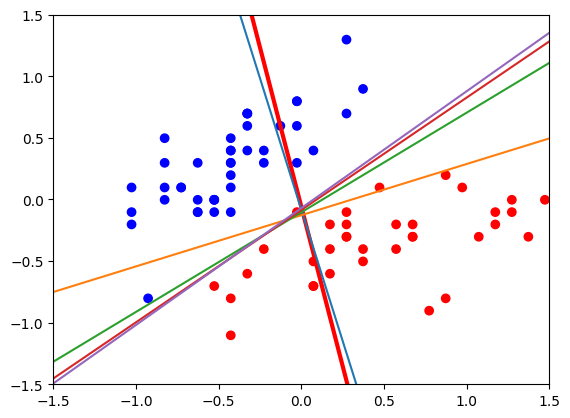

In [21]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=cm_pt)
plt.plot(x_, y_, color = "red", linewidth=3)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])

ce = []
acc = []

for i in range(0, iter + 1):
    with tf.GradientTape() as tape:
        PRED = 1 / (1 + tf.exp(-tf.matmul(X, W)))
        Loss = -tf.reduce_mean(Y*tf.math.log(PRED) + (1 - Y)*tf.math.log(1 - PRED))
        
    accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.where(PRED.numpy() < 0.5, 0., 1.), Y), tf.float32))
    ce.append(Loss)
    acc.append(accuracy)
    
    dL_dW = tape.gradient(Loss, W)
    W.assign_sub(learn_rate * dL_dW)
    
    if i % display_step == 0:
        print("i: %i, Acc: %f, Loss: %f" % (i, accuracy, Loss))
        y_ = -(W[1] * x_ + W[0])/W[2]
        plt.plot(x_, y_)

# 根据鸢尾花分类模型，绘制分类图

In [37]:
TEST_URL = "http://download.tensorflow.org/data/iris_test.csv"
test_path = tf.keras.utils.get_file(TEST_URL.split('/')[-1],TEST_URL)

df_iris_test = pd.read_csv(test_path, header=0)
iris_test = np.array(df_iris_test)

In [49]:
test_x = iris_test[:,0:2]
test_y = iris_test[:,4]

x_test = test_x[test_y < 2]
y_test = test_y[test_y < 2]

num_test = len(x_test)

x_test = x_test - np.mean(x_test,axis=0)

In [50]:
M = 300
x1_min, x2_min = x_test.min(axis = 0)
x1_max, x2_max = x_test.max(axis = 0)
t1 = np.linspace(x1_min, x1_max, M)
t2 = np.linspace(x2_min, x2_max, M)
m1, m2 = np.meshgrid(t1, t2)

In [51]:
m0 = np.ones(M*M)
X_mesh = tf.cast(np.stack((m0, m1.reshape(-1), m2.reshape(-1)), axis = 1), dtype = tf.float32)
Y_mesh = tf.cast(1 / (1 + tf.exp(-tf.matmul(X_mesh, W))), dtype = tf.float32)
Y_mesh = tf.where(Y_mesh < 0.5, 0, 1)

In [52]:
n = tf.reshape(Y_mesh, m1.shape)

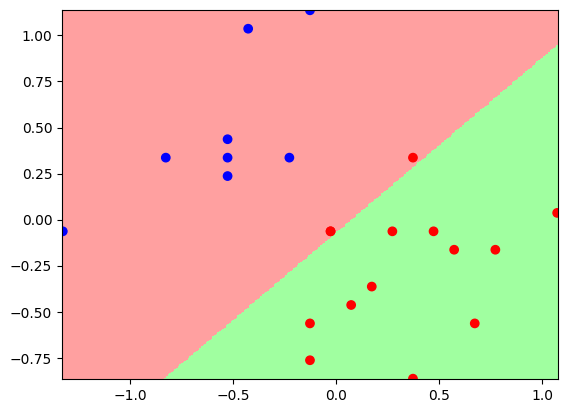

In [53]:
cm_pt = mpl.colors.ListedColormap(["blue", "red"])
cm_bg = mpl.colors.ListedColormap(["#FFA0A0", "#A0FFA0"])

plt.pcolormesh(m1, m2, n, cmap=cm_bg)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=cm_pt)
plt.show()